# The two-sites Hubbard model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import timeit

In [2]:
from qutip import tensor, destroy, qeye

def get_energies_2sHubbard_traditional(N, U = 1.):
    """
    """
    aL = tensor(destroy(N), qeye(N))
    aR = tensor(qeye(N), destroy(N))
    num_L = aL.dag() * aL
    num_R = aR.dag() * aR

    H = -(aL.dag() * aR + aR.dag() * aL) + U * (num_L * (num_L - 1) + num_R * (num_R - 1))
    
    return H.eigenenergies()

In [3]:
N_traditional = 2 ** np.array([3, 4, 5])##5, 6, 7, 8])



time_get_energies_2sHubbard_traditional = [
    timeit.timeit(
        f"get_energies_2sHubbard_traditional({_})", globals=globals(), number=5
    )
    for _ in N_traditional
]

time_get_energies_2sHubbard_traditional

[0.009571167000000047, 0.3363900000000001, 8.521990042]

In [4]:
def Cantor(x, y):
    return (x + y) * (x + y + 1) / 2 + y

def get_energies_2sHubbard_Cantor(N, U = 1.):
    """
    """
    z_max = Cantor(N, N)
    z = np.arange(0, z_max)

    w = np.floor(0.5 * (np.sqrt(8 * z + 1) - 1))
    y = z - w * (w + 1) / 2
    x = w - y

    nL = x.astype(int)
    nR = y.astype(int)
    
    return eigh_tridiagonal(
        U * (nL * (nL - 1) + nR * (nR - 1)), -np.sqrt((nL + 1) * nR)[1::],
        eigvals_only = True
    )

In [5]:
N_Cantor = 2 ** np.array([3, 4, 5, 6, 7])

time_get_energies_2sHubbard_Cantor = [
    timeit.timeit(
        f"get_energies_2sHubbard_Cantor({_})", globals=globals(), number=5
    )
    for _ in N_Cantor
]

In [6]:
time_get_energies_2sHubbard_Cantor

[0.0010805830000002459,
 0.0074098329999987556,
 0.05781637499999981,
 0.5653754580000001,
 8.784914125]

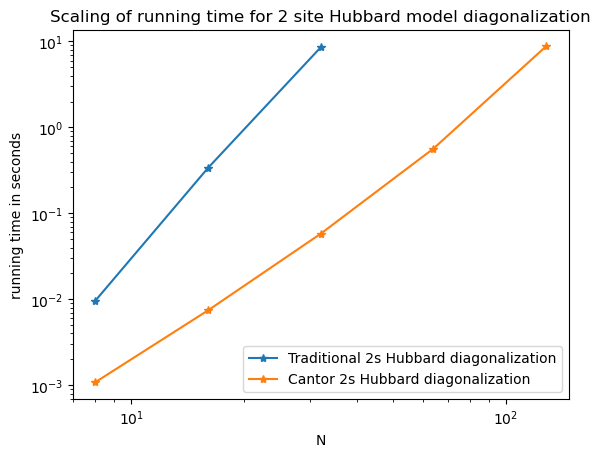

In [8]:
plt.title("Scaling of running time for 2 site Hubbard model diagonalization")
plt.loglog(N_traditional, time_get_energies_2sHubbard_traditional, "*-", label="Traditional 2s Hubbard diagonalization")
plt.loglog(N_Cantor, time_get_energies_2sHubbard_Cantor, "*-", label="Cantor 2s Hubbard diagonalization")
plt.xlabel("N")
plt.ylabel("running time in seconds")
plt.legend()
plt.show()